<a href="https://colab.research.google.com/github/Ilhan-Krdnz/gazi_ai_egitim/blob/main/mnist_dersi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli Kütüphaneler

In [60]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

Mnist datasetinin yüklenmesi

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

type() ve .shape fonksiyonları

In [62]:
print(x_train.shape)

(60000, 28, 28)


Rastgele bir resmin numpy görünümü ve .shape

In [63]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Resimlerin düzleştirilmesi(flatten) ve normalizasyon

In [64]:
x_train = x_train.reshape(-1, 28*28).astype('float') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float') / 255.0

düzleştirme ve normalizasyondan sonra .shape ve numpy görüntüsü

In [65]:
x_train.shape
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Sinir ağının(model) sequential fonksiyonu ile tanımlanması

In [66]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape = (784,), name='ilk_katman'),
    layers.Dense(256, activation='relu', name='ikinci_katman'),
    layers.Dense(10, activation = 'softmax')
])

Model özeti(model.summary)

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ilk_katman (Dense)          (None, 512)               401920    
                                                                 
 ikinci_katman (Dense)       (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


.compile fonskiyonu

In [68]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics = ['accuracy']
)

Eğitim aşaması(hist = model.fit()) ve validation_data parametresi

In [69]:
hist = model.fit(x_train, y_train, batch_size=32, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1870 - accuracy: 0.9433 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.0796 - val_accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0826 - val_accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0801 - val_accuracy: 0.9785


Hist değişkeni, test datasetiyle modelin değerlendirilmesi ve kaydedilmesi

In [70]:
hist.history
model.save('ilk_modelim')

Hist icindeki degiskenlerin atanmasi, matplotlib ile grafik analizi

In [71]:
dogruluk = hist.history['accuracy']
kayip = hist.history['loss']
val_dogruluk = hist.history['val_accuracy']
val_kayip = hist.history['val_loss']

Doğruluk oranlarının çizilmesi ve karşılaştırılması

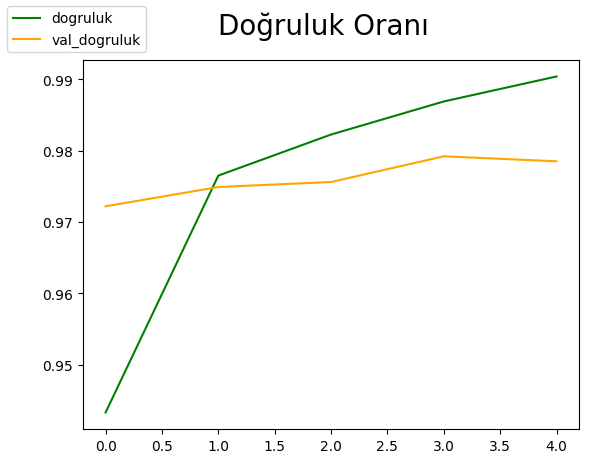

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(dogruluk, color = 'green', label = 'dogruluk')
plt.plot(val_dogruluk, color = 'orange', label = 'val_dogruluk')
fig.suptitle('Doğruluk Oranı', fontsize = 20)
fig.legend(loc='upper left')
plt.show()

Kayıp oranlarının çizdirilmesi ve karşılaştırılması

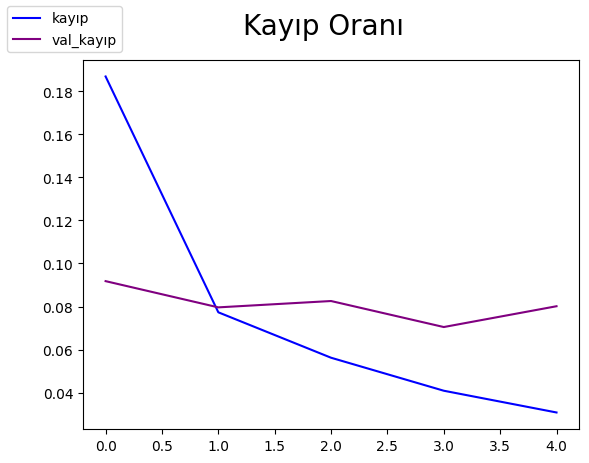

In [73]:
fig = plt.figure()
plt.plot(kayip, color = 'blue', label = 'kayıp')
plt.plot(val_kayip, color = 'purple', label = 'val_kayıp')
fig.suptitle('Kayıp Oranı', fontsize = 20)
fig.legend(loc = 'upper left')
plt.show()

Kendi çizdiğimiz resmi sergileme(preprossesing.image, matplotlib.pyplot)

In [74]:
from tensorflow.keras.preprocessing import image

resim_yolu = '/content/test_resmi.png'
resim = image.load_img(resim_yolu, color_mode = 'grayscale', target_size = (28,28))
array_resim = image.img_to_array(resim)
duz_array_resim = array_resim.reshape(-1, 28*28).astype('float32') / 255.0

Modeli Yükleme

In [75]:
from tensorflow.keras.models import load_model
load_model('ilk_modelim')

Tahmin fonksiyonu

In [76]:
def tahmin_fonksiyonu(array_resim):
    if array_resim.shape == (784,):
      array_resim = np.expand_dims(array_resim, axis = 0)
    tahminler = model.predict(array_resim)
    tahmin = np.argmax(tahminler, axis = 1)
    return tahmin

Çiz fonksiyonu

In [77]:
def ciz(resim, tahmin):
  plt.figure(figsize = (4,4))
  plt.imshow(resim.squeeze(), cmap='gray')
  plt.title(f'Modelin Tahmini:{tahmin[0]}')
  plt.show()

Kendi çizdiğimiz resmi çizdirme

1/1 [==============================] - 0s 70ms/step


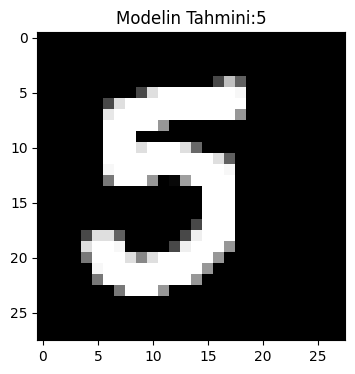

In [78]:
tahmin = tahmin_fonksiyonu(duz_array_resim)
ciz(array_resim, tahmin)


Test datasetinden bir resim çizdirme

1/1 [==============================] - 0s 20ms/step


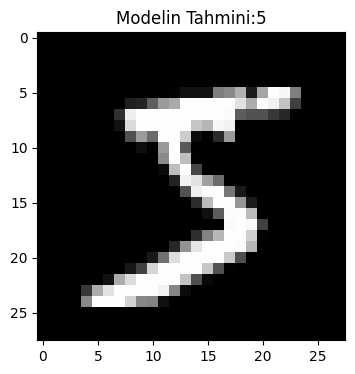

In [79]:
img_array = x_train[0]
deflattened_img_array = img_array.reshape(-1, 28, 28).astype('float32') * 255
tahmin = tahmin_fonksiyonu(img_array)
ciz(deflattened_img_array, tahmin)